<h2><b>Предподготовка данных

<h3>Загрузка данных и удаление пустых строк из прогнозируемой величины

In [650]:
target_feature = 'iAUC120'
cat_features = ['meal_type_n', 'daytime', 'part_of_day', 'диета_до_1визита', 'отеки1', 'образование', 'menses', 'АГ', 'НТГ', 'гсд_анамнез', 'СПКЯ', 'СД_у_родственников', 'пролактин', 'КОК',
                'курение_до_беременности', 'курение_во_время', 'фрукты1', 'пирожные1', 'выпечка1', 'шоколад1', 'молочное_обезжир1', 'молочное_необезжир1', 'бобовые1', 'мясо1', 'сухофрукты1',
                'рыба1', 'хлеб_цельное1', 'хлеб_любой1', 'соусы1','овощи1', 'овощи1_сырые', 'алкоголь1', 'сладкие_напитки1', 'кофе1', 'сосиски1', 'фрукты2', 'пирожные2', 'выпечка2', 'шоколад2',
                'молочное_обезжир2', 'молочное_необезжир2', 'бобовые2', 'мясо2', 'сухофрукы2', 'рыба2', 'хлеб_цельнозерновой_2', 'хлеб_любой2', 'соусы2','овощи2', 'овощи2_сырые', 'алкоголь2', 'сладкие_напитки2',
                'кофе2', 'сосиски2', 'ходьба1', 'подъем1', 'спорт1', 'ходьба2', 'подъем2', 'спорт2']

In [651]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv', delimiter=';', index_col=1)

data = data.drop(columns=['meal_id', 'n_cgm', 'CGM_range', 'CGM_mean', 'CGM_below', 'CGM_above', 'BGb60_to_mean', 'quality_diary_x', 'срок_берем1', 'через1час_тест', 'через2часа_тест', 'Run'])
data.dropna(subset=target_feature, axis=0, inplace=True)

data[cat_features] = data[cat_features].astype('str')

<h3>Набор данных с микробиомом

In [652]:
data = data.sample(frac=1, random_state=1, replace=False)
data.head(10)

,preg_week,meal_type_n,gi,gl,carbo,prot,fat,kcal,water,mds,...,инсулин_V1,лептин_V1,ФР_V1,БОМК_визит1,Хол_V1,ТГ_V1,ЛПВП_V1,ЛПОНП_V1,ЛПНП_V1,КА_V1
N,,,,,,,,,,,,,,,,,,,,,
797,31.0,1,42.7,5.6,13.2,25.5,22.9,372.2,357.79,29.81,...,77.92,24.96,203.00,0.202,5.57,1.59,1.66,0.729358,3.180642,2.355422
857,30.0,3,NaN,NaN,54.9,35.1,37.0,705.2,660.68,32.66,...,81.19,17.83,191.00,0.282,7.62,1.73,2.37,0.793578,4.456422,2.215190
685,33.0,3,67.7,48.2,71.2,50.8,69.5,1123.8,477.65,20.40,...,121.00,62.12,215.00,0.099,7.63,3.86,1.57,1.770642,4.289358,3.859873
581,35.0,4,48.7,5.7,11.7,1.6,0.4,62.0,181.67,18.23,...,119.80,39.15,197.00,0.445,4.70,1.06,1.97,0.486239,2.243761,1.385787
291,35.0,3,45.8,15.8,34.5,21.4,13.6,349.3,186.36,3.49,...,34.10,4.82,185.34,0.385,6.20,1.53,1.81,0.701835,3.688165,2.425414
786,33.0,4,13.0,1.9,14.7,21.4,80.3,865.9,5.02,5.15,...,131.40,42.56,171.00,0.159,7.74,3.11,1.54,1.426606,4.773394,4.025974
779,32.0,4,39.0,1.5,3.9,0.2,0.2,18.8,34.52,3.60,...,51.92,12.53,189.00,0.106,4.04,2.36,1.22,1.082569,1.737431,2.311475
346,31.0,3,34.9,16.7,35.3,13.7,5.6,246.3,260.41,9.08,...,73.60,42.50,185.57,0.070,5.52,1.20,1.94,0.550459,3.029541,1.845361
856,30.0,4,39.0,7.6,19.6,0.8,0.6,89.3,161.50,18.62,...,37.99,8.45,209.00,0.405,7.32,2.04,1.92,0.935780,4.464220,2.812500


<h3>Набор данных без бикробиома

In [653]:
clinical_data = data.drop(list(data.filter(regex=';')), axis=1, inplace=False)
clinical_data.head(10)

,preg_week,meal_type_n,gi,gl,carbo,prot,fat,kcal,water,mds,...,инсулин_V1,лептин_V1,ФР_V1,БОМК_визит1,Хол_V1,ТГ_V1,ЛПВП_V1,ЛПОНП_V1,ЛПНП_V1,КА_V1
N,,,,,,,,,,,,,,,,,,,,,
797,31.0,1,42.7,5.6,13.2,25.5,22.9,372.2,357.79,29.81,...,77.92,24.96,203.00,0.202,5.57,1.59,1.66,0.729358,3.180642,2.355422
857,30.0,3,NaN,NaN,54.9,35.1,37.0,705.2,660.68,32.66,...,81.19,17.83,191.00,0.282,7.62,1.73,2.37,0.793578,4.456422,2.215190
685,33.0,3,67.7,48.2,71.2,50.8,69.5,1123.8,477.65,20.40,...,121.00,62.12,215.00,0.099,7.63,3.86,1.57,1.770642,4.289358,3.859873
581,35.0,4,48.7,5.7,11.7,1.6,0.4,62.0,181.67,18.23,...,119.80,39.15,197.00,0.445,4.70,1.06,1.97,0.486239,2.243761,1.385787
291,35.0,3,45.8,15.8,34.5,21.4,13.6,349.3,186.36,3.49,...,34.10,4.82,185.34,0.385,6.20,1.53,1.81,0.701835,3.688165,2.425414
786,33.0,4,13.0,1.9,14.7,21.4,80.3,865.9,5.02,5.15,...,131.40,42.56,171.00,0.159,7.74,3.11,1.54,1.426606,4.773394,4.025974
779,32.0,4,39.0,1.5,3.9,0.2,0.2,18.8,34.52,3.60,...,51.92,12.53,189.00,0.106,4.04,2.36,1.22,1.082569,1.737431,2.311475
346,31.0,3,34.9,16.7,35.3,13.7,5.6,246.3,260.41,9.08,...,73.60,42.50,185.57,0.070,5.52,1.20,1.94,0.550459,3.029541,1.845361
856,30.0,4,39.0,7.6,19.6,0.8,0.6,89.3,161.50,18.62,...,37.99,8.45,209.00,0.405,7.32,2.04,1.92,0.935780,4.464220,2.812500


<h2><b>Обучение модели

<h3>Разбили на тестовую и обучающую выборки

In [654]:
from sklearn.model_selection import train_test_split

X_clinical = clinical_data.drop(columns=['BG30', 'BG60', 'BG90', 'BG120', 'BGMax', 'BGLag', 'BGRise', 'AUC60', 'AUC120', 'iAUC60', 'iAUC120'])
Y_clinical = clinical_data[target_feature]
N_train_clinical, N_test_clinical = train_test_split(np.unique(clinical_data.index), random_state=1)

In [655]:
def shuffled_split(X, Y, N_train, N_test):
    return X.loc[N_train].sample(frac=1, random_state=1, replace=False), Y.loc[N_train].sample(frac=1, random_state=1, replace=False), \
           X.loc[N_test].sample(frac=1, random_state=1, replace=False), Y.loc[N_test].sample(frac=1, random_state=1, replace=False)

In [656]:
X_train_clinical, Y_train_clinical, X_test_clinical, Y_test_clinical = shuffled_split(X_clinical, Y_clinical, N_train_clinical, N_test_clinical)

In [657]:
print('Номера (N) пациентов из таблицы данных без микробиома\n')
print(f'Тренировочная выборка: {N_train_clinical}\n')
print(f'Тестовая выборка: {N_test_clinical}')

Номера (N) пациентов из таблицы данных без микробиома

Тренировочная выборка: [591 395 832 563 719 847 480 828 826 803 713 808 779 845 438 602 718 707
 724 610 310 440 704 696 836 796 521 857 581 617 337 797 346 853 289 470
 281 446 328 414 363 362 426 795 773]

Тестовая выборка: [786 791 291 814 827 661 721 744 790 783 613 835 799 292 685 856]


<h3>Поиск параметров модели по сетке

In [ ]:
from catboost import CatBoostRegressor, Pool

model = CatBoostRegressor(random_seed=1, verbose=False)
grid = {'iterations': [150, 250, 350],
              'learning_rate': [.1, .07, .03],
              'depth': [4, 6, 8],
              'l2_leaf_reg': [0, 1, 2]
              }
grid_search_result = model.grid_search(grid, X = Pool(X_train_clinical, Y_train_clinical, cat_features = cat_features))
print(grid_search_result['params'])

<h3> Прогнозирование на тестовой выборке

In [728]:
train_clinical_pool = Pool(X_train_clinical, Y_train_clinical, cat_features = cat_features)
test_clinical_pool = Pool(X_test_clinical, cat_features = cat_features)

model.fit(train_clinical_pool)
Y_pred_clinical = model.predict(test_clinical_pool)

<h3>Расчет статистики

In [729]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy import stats

r = stats.pearsonr(Y_pred_clinical, Y_test_clinical)
print(f"R : {round(r[0],2)}, p-value={round(r[1],2)}")
print("R^2 : ", round(r2_score(Y_test_clinical, Y_pred_clinical),2))
print("MAE : ", round(mean_absolute_error(Y_test_clinical, Y_pred_clinical),2))
print("RMSE: ", round(np.sqrt(mean_squared_error(Y_test_clinical, Y_pred_clinical)),2))
print(f'Тренировочная выборка: {X_train_clinical.shape[0]} записей / {len(np.unique(X_train_clinical.index))} \
пациентов\nТестовая выборка: {X_test_clinical.shape[0]} запсией / {len(np.unique(X_test_clinical.index))} пациентов')

R : 0.64, p-value=0.0
R^2 :  0.41
MAE :  0.36
RMSE:  0.49
Тренировочная выборка: 1395 записей / 45 пациентов
Тестовая выборка: 488 запсией / 16 пациентов


<h3>Графики

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(train_clinical_pool)
shap.summary_plot(shap_values, X_train_clinical, max_display=round(X_train_clinical.shape[1]*0.1))

<h3>Повтор шагов для данных с добавлением микробиома

In [731]:
X_micr = data.drop(columns=['BG30', 'BG60', 'BG90', 'BG120', 'BGMax', 'BGLag', 'BGRise', 'AUC60', 'AUC120', 'iAUC60', 'iAUC120'])
Y_micr = data[target_feature]
N_train_micr, N_test_micr = train_test_split(np.unique(data.index), random_state=1)

In [732]:
X_train_micr, Y_train_micr, X_test_micr, Y_test_micr = shuffled_split(X_micr, Y_micr, N_train_micr, N_test_micr)

In [733]:
print('Номера (N) пациентов из таблицы данных c микробиомом\n')
print(f'Тренировочная выборка: {N_train_micr}\n')
print(f'Тестовая выборка: {N_test_micr}')

Номера (N) пациентов из таблицы данных c микробиомом

Тренировочная выборка: [591 395 832 563 719 847 480 828 826 803 713 808 779 845 438 602 718 707
 724 610 310 440 704 696 836 796 521 857 581 617 337 797 346 853 289 470
 281 446 328 414 363 362 426 795 773]

Тестовая выборка: [786 791 291 814 827 661 721 744 790 783 613 835 799 292 685 856]


In [734]:
train_micr_pool = Pool(X_train_micr, Y_train_micr, cat_features = cat_features)
test_micr_pool = Pool(X_test_micr, cat_features = cat_features)

model.fit(train_micr_pool)
Y_pred_micr = model.predict(test_micr_pool)

In [735]:
r = stats.pearsonr(Y_test_micr, Y_pred_micr)
print(f"R : {round(r[0],2)}, p-value={round(r[1],2)}")
print("R^2 : ", round(r2_score(Y_test_micr, Y_pred_micr),2))
print("MAE : ", round(mean_absolute_error(Y_test_micr, Y_pred_micr),2))
print("RMSE: ", round(np.sqrt(mean_squared_error(Y_test_micr, Y_pred_micr)),2))
print(f'Тренировочная выборка: {X_train_micr.shape[0]} записей / {len(np.unique(X_train_micr.index))} \
пациентов\nТестовая выборка: {X_test_micr.shape[0]} запсией / {len(np.unique(X_test_micr.index))} пациентов')

R : 0.64, p-value=0.0
R^2 :  0.4
MAE :  0.36
RMSE:  0.49
Тренировочная выборка: 1395 записей / 45 пациентов
Тестовая выборка: 488 запсией / 16 пациентов


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


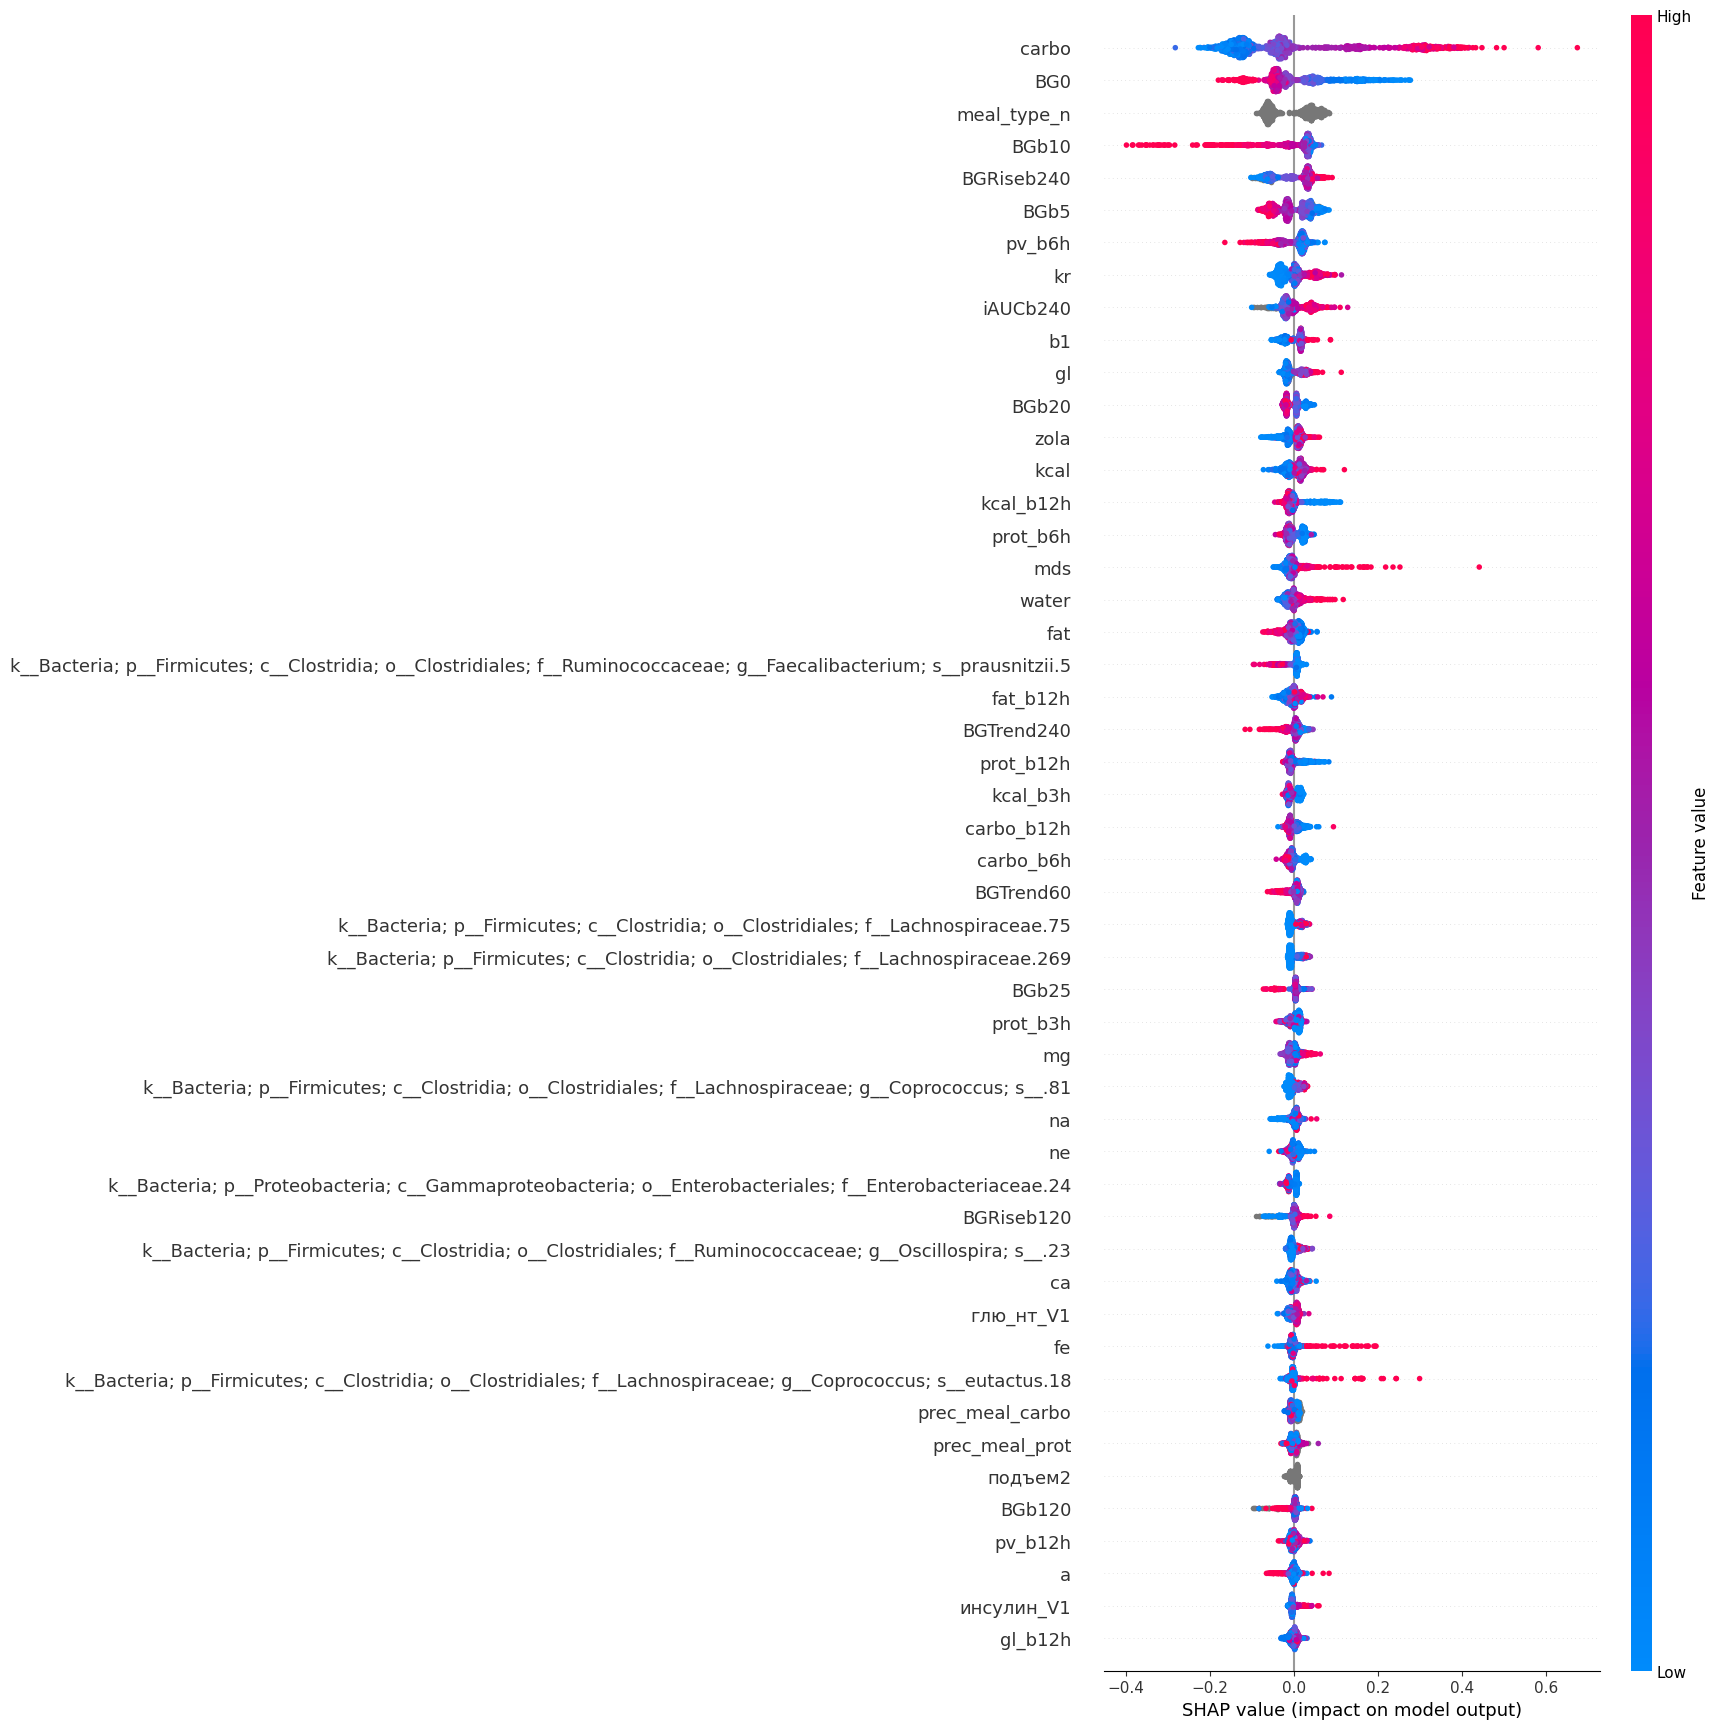

In [736]:
import shap

explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(train_micr_pool)
shap.summary_plot(shap_values, X_train_micr, max_display=50)